# EDA 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'time_series_clustering_csv.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Data Cleaning
# Select only the columns with years and relevant information
year_columns = [col for col in data.columns if col.isdigit()]
subset_columns = ['Country/Regional and global averages', 'Region'] + year_columns
data_cleaned = data[subset_columns]


data_cleaned.head()
year_columns
data.columns

Index(['Country/Regional and global averages', 'Region', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2022 data sources', '2000.1', '2001.1',
       '2002.1', '2003.1', '2004.1', '2005.1', '2006.1', '2007.1', '2008.1',
       '2009.1', '2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1',
       '2016.1', '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1'],
      dtype='object')

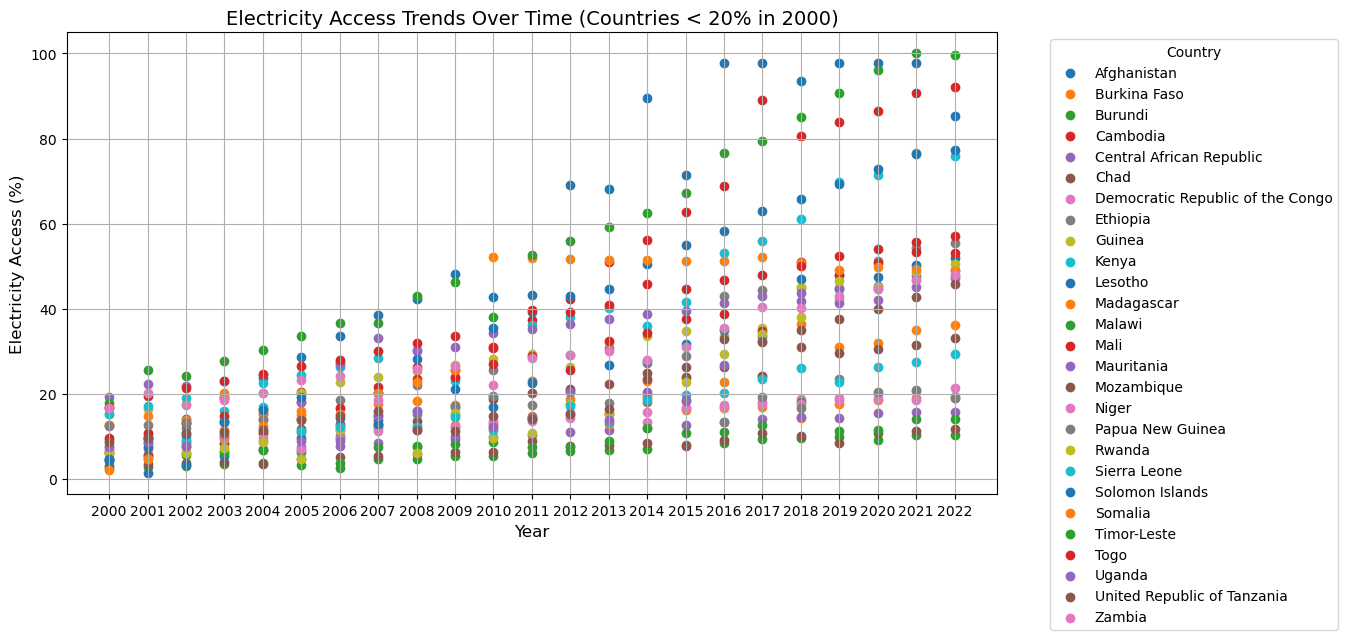

In [80]:
# Drop rows with missing values in year columns
data_cleaned = data_cleaned.dropna(subset=year_columns)

# Convert year columns to numeric for filtering and plotting
data_cleaned[year_columns] = data_cleaned[year_columns].apply(pd.to_numeric)

# Filter countries where electricity access in 2000 is less than 100%
filtered_countries = data_cleaned[data_cleaned['2000'] < 20  ] 
selected_countries = filtered_countries['Country/Regional and global averages'].tolist()

# Visualization: Scatter Plot for Selected Countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = filtered_countries[filtered_countries['Country/Regional and global averages'] == country]
    plt.scatter(year_columns, country_data[year_columns].values.flatten(), label=country)

# Customize the plot
plt.title('Electricity Access Trends Over Time (Countries < 20% in 2000)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Access (%)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# plt.tight_layout()
plt.show()

In [8]:
data.head()

,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,Afghanistan,Central Asia and Southern Asia,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,1.008029e+07,3.435202e+06,9.619747e+06,796632.761000,819798.614000,2.410000e+06,868698.477,896361.290000,922287.626000,6.045929e+06
1,Albania,Northern America and Europe,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,...,3.175563e+03,1.444552e+03,5.761406e+02,3163.711100,3160.802700,0.000000e+00,0.000,0.000000,0.000000,0.000000e+00
2,Algeria,Western Asia and Northern Africa,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,...,3.085927e+05,2.811851e+05,2.545814e+05,228444.471259,193332.852947,1.518843e+05,213526.840,122197.865328,93733.926231,7.095159e+04
3,American Samoa,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Andorra,Northern America and Europe,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000,0.000000,0.000000,0.000000e+00


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [47]:
# Load the data
file_path = 'time_series_clustering_csv.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [48]:
# Data Cleaning
year_columns = [col for col in data.columns if col.isdigit()]
subset_columns = ['Country/Regional and global averages', 'Region'] + year_columns
data_cleaned = data[subset_columns]
data_cleaned = data_cleaned.dropna(subset=year_columns)
data_cleaned[year_columns] = data_cleaned[year_columns].apply(pd.to_numeric)

In [73]:
data_cleaned.columns

Index(['Country/Regional and global averages', 'Region', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [74]:
# Filter countries where electricity access in 2000 is less than 10%
filtered_data = data_cleaned[data_cleaned['2000'] <20]

In [75]:
filtered_data

,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Central Asia and Southern Asia,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,85.30
31,Burkina Faso,Sub-Saharan Africa,9.101531,9.513818,9.917558,11.400000,10.727426,11.147568,11.586964,12.047199,...,15.388514,19.200000,16.153200,16.567396,17.013321,14.400000,17.600000,18.467279,18.950687,18.99
32,Burundi,Sub-Saharan Africa,2.538278,2.832108,3.117390,3.401134,3.690344,3.207317,2.660000,4.654745,...,6.900000,7.000000,7.890115,8.477999,9.300000,9.509293,9.839400,9.100000,10.233828,10.28
34,Cambodia,Eastern Asia and South-eastern Asia,16.600000,9.528574,13.109128,19.300000,14.200000,20.500000,27.485788,20.200000,...,50.900000,56.100000,62.720646,68.762199,89.070000,80.700829,84.000000,86.400000,90.800000,92.00
38,Central African Republic,Sub-Saharan Africa,6.000000,5.706450,6.132954,6.557919,6.988350,7.431255,7.805169,8.376415,...,11.501782,12.036706,12.712991,13.404803,14.070508,14.643955,14.300000,15.405713,15.680277,15.70
39,Chad,Sub-Saharan Africa,3.110457,3.442218,3.765432,4.087106,3.500000,4.753862,5.112732,5.492441,...,8.090240,8.432096,7.700000,9.245298,10.900000,10.058806,8.400000,10.865677,11.268559,11.71
57,Democratic Republic of the Congo,Sub-Saharan Africa,6.700000,7.111348,7.726086,8.339285,8.957952,6.000000,10.239486,15.200000,...,15.165495,13.500000,16.584459,17.287302,17.986826,18.683859,19.100000,20.073780,20.768187,21.49
69,Ethiopia,Sub-Saharan Africa,12.700000,10.219621,11.876158,13.531156,15.191621,14.000000,18.556753,20.269785,...,30.775352,27.200000,29.000000,42.900000,44.300000,44.844326,48.047619,51.144596,54.188416,55.39
86,Guinea,Sub-Saharan Africa,15.155793,16.421024,17.677710,18.932854,20.193466,20.200000,22.758894,24.072073,...,32.178524,33.532440,34.881382,33.500000,35.400000,45.000000,42.200000,44.745422,46.813869,47.72
105,Kenya,Sub-Saharan Africa,15.175694,17.048136,18.912029,16.000000,22.642206,24.522501,26.422052,28.342442,...,40.092152,36.000000,41.600000,53.100000,55.831993,61.180614,69.700000,71.492714,76.542450,76.00


In [55]:
# # Prepare data for regression
# X = filtered_data[year_columns].values
# y = filtered_data['Country/Regional and global averages']

In [39]:
# # Create time indices for the years
# time_indices = np.array([int(year) for year in year_columns]).reshape(-1, 1)

In [83]:
# Prepare the features (X) and target (y)
# X: Electricity access data across years for each country (numeric)
X = filtered_data[year_columns].values

# y: Target variable is the electricity access in 2022 (numeric)
y = filtered_data[year_columns]

print(X)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


[[  4.44689083   9.29452705  14.13361645  18.9711647   23.81418228
   28.66967201  33.54441833  38.44000244  42.4         48.27900696
   42.7         43.22201891  69.1         68.0408783   89.5
   71.5         97.7         97.7         93.43087769  97.7
   97.7         97.7         85.3       ]
 [  9.10153103   9.51381779   9.91755772  11.4         10.72742558
   11.14756775  11.58696365  12.04719925  12.52466011  12.63
   13.1         14.77559948  15.06582069  15.38851357  19.2
   16.15320015  16.56739616  17.01332092  14.4         17.6
   18.46727943  18.95068741  18.99      ]
 [  2.53827786   2.83210754   3.11739039   3.40113354   3.69034386
    3.20731707   2.66         4.6547451    4.8          5.38613892
    5.3          6.15572309   6.5          6.9          7.
    7.89011478   8.47799873   9.3          9.5092926    9.83940029
    9.1         10.23382759  10.28      ]
 [ 16.6          9.52857399  13.109128    19.3         14.2
   20.5         27.48578835  20.2         26.4      

LinearRegression()

'sklearn.linear_model._base'

In [69]:
arr=[]
for i in range(1,24):
    arr.append(2030)
print(len(arr))
print(arr)
arr=np.array(arr)
print(arr)

23
[2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030, 2030]
[2030 2030 2030 2030 2030 2030 2030 2030 2030 2030 2030 2030 2030 2030
 2030 2030 2030 2030 2030 2030 2030 2030 2030]


In [84]:
import numpy as np

# Create the input feature vector for the year 2030
year_2030_feature = np.array([arr])  # Adjust the shape as required by your model

# Predict the electricity access percentage for 2030
prediction_2030 = model.predict(year_2030_feature)

# Print the prediction
print(f"Predicted electricity access for 2030: {prediction_2030[0]:.2f}%")


TypeError: unsupported format string passed to numpy.ndarray.__format__

KeyError: 'Predicted 2030'

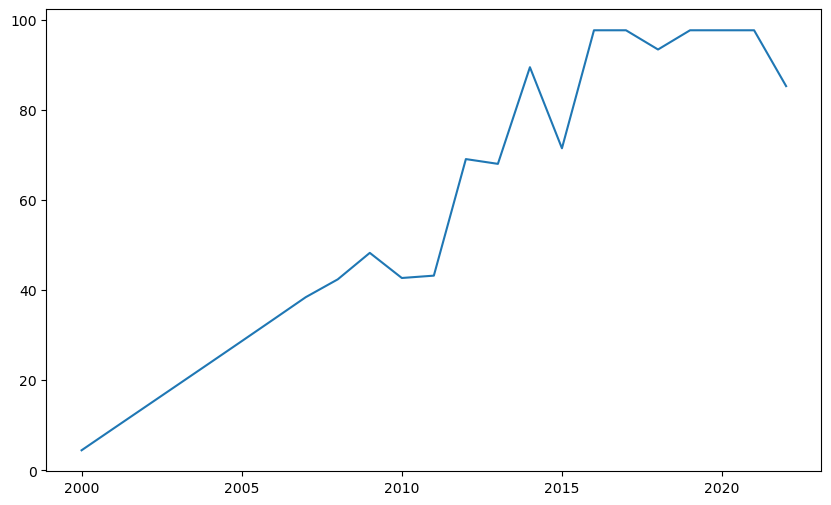

In [45]:
# Plot Predictions for a Sample Country
sample_country = 'Afghanistan'  # Replace with any country of interest
sample_data = filtered_data[filtered_data['Country/Regional and global averages'] == sample_country]

plt.figure(figsize=(10, 6))
plt.plot(time_indices.flatten(), sample_data[year_columns].values.flatten(), label='Historical Data')
plt.scatter([2030], sample_data['Predicted 2030'], color='red', label='Predicted 2030')
plt.title(f'Electricity Access Prediction for {sample_country}', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Access (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Summary
print(filtered_data[['Country/Regional and global averages', 'Predicted 2030']])